In [1]:
import sys
try:
    import sntd
except:
    sys.path.append('../')
    import sntd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
myMISN = sntd.createMultiplyImagedSN(sourcename='salt2-extended', snType='Ia', redshift=1.4,z_lens=.53, bands=['F110W','F125W','F140W','F160W'],
              zp=[26.9,26.8,26.4,26.2], cadence=5., epochs=35.,time_delays=[20., 70.], magnifications=[2.5,5],scatter=True,
              objectName='My Type Ia SN',telescopename='HST',numImages=2,av_host=False)

In [3]:
print(myMISN.images['image_1'].simMeta)
#myMISN.plot_object()

OrderedDict([('z', 1.4), ('t0', 20.0), ('x0', 4.130171805520323e-06), ('x1', 0.17412418525702905), ('c', 0.18336794700162262), ('sourcez', 1.4), ('model', <sncosmo.models.Model object at 0x1a10f44f98>), ('hostebv', 0), ('lensebv', 0), ('lensz', 0.53), ('mu', 2.5), ('td', 20.0), ('microlensing', None), ('microlensing_type', None)])


{'image_1': 0, 'image_2': 50.048508685586924}
17.053504943847656


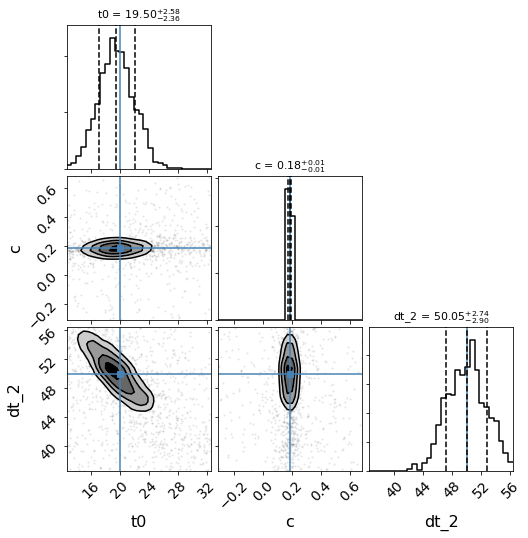

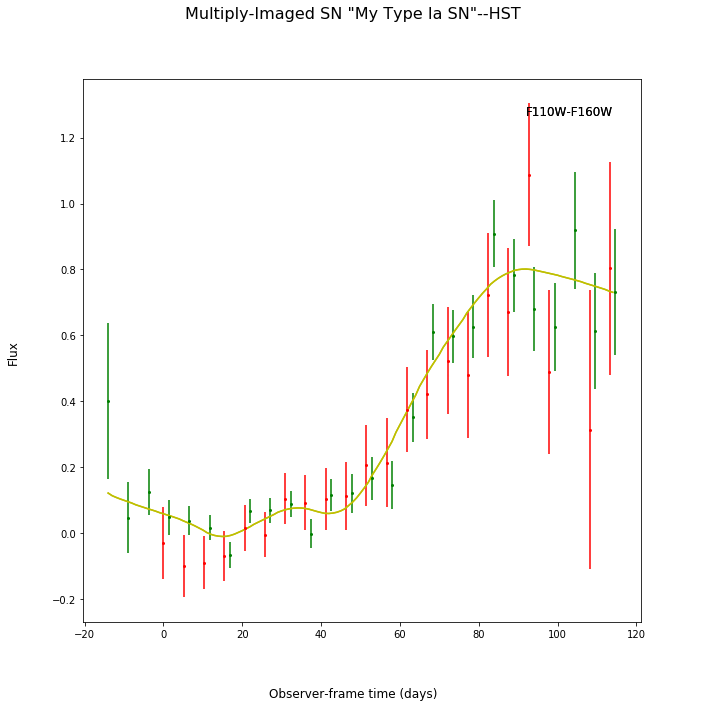

In [5]:

start = time.time()
#normal parallel fit with some options set
fitCurves=sntd.fit_data(myMISN,snType='Ia', models='salt2-extended',
                        bands=['F110W','F125W','F140W','F160W'],color_bands=['F110W','F160W'],
            params=['x0','x1','t0','c'],constants={'z':1.4},refImage='image_1',cut_time=[-50,40],
            color_param_ignore=['x1'],
            bounds={'t0':(-20,20),'x1':(-3,3),'c':(-1,1),'td':(-20,20),'mu':(.5,2)},
            fitOrder=['image_2','image_1'],fit_prior=False,trial_fit=True,minsnr=3,
            method='color',microlensing=None,modelcov=False,npoints=200,
                        clip_data=True,maxiter=None)

print(fitCurves.color.time_delays)
fitCurves.plot_fit(method='color')
fitCurves.plot_object(method='color',showFit=True)
end = time.time()
print(end - start)

In [ ]:
fitCurves.plot_object(method='color',showFit=True)

In [ ]:
import scipy,copy
mod=fitCurves.images['image_1'].fits.model
#fitCurves.images['image_1'].table['time']+=5
inds=np.where(fitCurves.images['image_1'].table['band']=='F110W')[0]
obs=copy.copy(fitCurves.images['image_1'].table['flux'])[inds]
err=copy.copy(fitCurves.images['image_1'].table['fluxerr'])[inds]
t=fitCurves.images['image_1'].table['time'][inds]+5
zp=fitCurves.images['image_1'].table['zp'][inds][0]
zpsys=fitCurves.images['image_1'].zpsys
def fitSalt(t0):
    mod.set(t0=t0)
    mod_obs=mod.bandflux('F110W',t,zp=zp,zpsys=zpsys)
    print(t0,np.sum((obs-mod_obs)**2/err**2))
    return(np.sum((obs-mod_obs)**2/err**2))

x=scipy.optimize.least_squares(fitSalt,fitCurves.images['image_1'].fits.model.get('t0')-3,
                              bounds=[10,50],loss='cauchy').x

In [ ]:
print(x,fitSalt(x),fitSalt(25),fitCurves.images['image_1'].fits.model.get('t0'))
mod.set(t0=x)
plt.plot(t,mod.bandflux('F110W',t,zp=zp,zpsys=zpsys))
plt.scatter(t,obs)

In [ ]:
#normal parallel fit with some options set
print(myMISN.images['image_1'].simMeta)
bind=np.where(myMISN.images['image_1'].table['band']=='F125W')[0]
print(np.max(myMISN.images['image_1'].table['flux'][bind]))
myMISN.images['image_1'].table['flux'][bind]*=1.3
print(np.max(myMISN.images['image_1'].table['flux'][bind]))
fitCurves=sntd.fit_data(myMISN,snType='Ia', models='salt2-extended',
                        bands=['F110W','F125W','F140W','F160W'],
            params=['x0','t0','x1','c'],constants={'z':1.4},refImage='image_1',cut_time=[-50,30],
            bounds={'t0':(-20,20),'x1':(-3,3),'c':(-1,1),'td':(-20,20)},identify_micro=True,
            fitOrder=['image_2','image_1'],fit_prior=None,trial_fit=True,minsnr=3,
            method='parallel',microlensing=None,modelcov=False,npoints=200,clip_data=True,
            maxiter=None,band_order=['F110W','F125W','F140W','F160W'])
fitCurves.plot_object(showFit=True)
for im in fitCurves.images.keys():
    fitCurves.plot_fit(par_image=im)
print(fitCurves.parallel.time_delays)

In [ ]:
fitCurves.plot_object(method='color',showFit=True,bands=fitCurves.color.bands)